# Proyek Analisis Data: Nama dataset
- Nama: Ahmad Rizky Fadhilah
- Email: inirspn@gmail.com
- Id Dicoding: inirspn (saya tidak mengerti dimana menemukan id nya jadi saya masukan username)

## Menentukan Pertanyaan Bisnis

- Jam berapa pengguna sepeda paling banyak menyewa sepeda dalam satu hari, dan bagaimana pola penggunaannya antara pengguna casual dan registered?
- Bagaimana tren peminjaman sepeda berdasarkan musim (season)?
- Bulan apa yang menunjukkan tingkat peminjaman sepeda tertinggi dalam setahun?

## Menyiapkan semua library yang dibutuhkan

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px

## Data Wrangling

### Gathering Data

In [121]:
# file_path = '/mnt/windows/e-course/learn/testproject/data/day.csv'

# day_df = pd.read_csv(file_path)
hour_df = pd.read_csv("./data/hour.csv")
day_df = pd.read_csv("./data/day.csv")

#display untuk menampilkan 2 data sekaligus
display(hour_df.head(5))
display(day_df.head(5))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [122]:
display(hour_df.describe())
display(day_df.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Assessing Data

#### Menilai Data

In [123]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


In [124]:
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


### Cleaning Data

In [125]:
hour_df.drop(['holiday'], axis=1, inplace=True),
day_df.drop(['holiday'], axis=1, inplace=True)
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null

In [126]:

# Rename 
day_df.rename(columns={'dteday':'date', 
                    'yr':'year', 
                    'mnth':'month', 
                    'weekday':'day', 
                    'weathersit':'weather',
                    'season' : 'seasons',
                    'hum':'humidity', 
                    'cnt':'total_user'}, 
           inplace=True)

hour_df.rename(columns={'dteday':'date', 
                    'hr' : 'hour',
                    'yr':'year', 
                    'mnth':'month', 
                    'weekday':'day', 
                    'weathersit':'weather', 
                    'season' : 'seasons',
                    'hum':'humidity', 
                    'cnt':'total_user'}, 
           inplace=True)
hour_df['workingday'] = hour_df['workingday'].replace({
    0: 'weekend',
    1: 'working'
})
day_df['workingday'] = day_df['workingday'].replace({
    0: 'weekend',
    1: 'working'
})

In [127]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 
              2: 'Wednesday', 3: 'Thursday', 
              4:'Friday', 5:'Saturday', 6:'Sundau'}

day_df['day'] = day_df['day'].map(day_mapping)
hour_df['day'] = hour_df['day'].map(day_mapping)

In [128]:
month_mapping = {1: 'January', 2: 'February', 
                3: 'March', 4:'April', 
                5:'May', 6:'June', 7:'July',
                8:'August', 9:'September', 
                10:'October', 11:'November', 12:'December'}

day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

In [129]:
season_mapping = {1: 'Springer', 2: 'Summer',
                  3: 'Fall',4: 'Winter'}

day_df['seasons'] = day_df['seasons'].map(season_mapping)
hour_df['seasons'] = hour_df['seasons'].map(season_mapping)

In [130]:
year_mapping = {0: '2011', 1: '2012'}

day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [131]:
weather_mapping = {1: 'Clear', 2: 'Mist',
                  3: 'Light Snow',4: 'Heavy Rain'}

day_df['weather'] = day_df['weather'].map(weather_mapping)
hour_df['weather'] = hour_df['weather'].map(weather_mapping)

In [132]:
display(hour_df.info())
display(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   seasons     17379 non-null  object 
 3   year        17379 non-null  object 
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   day         17379 non-null  object 
 7   workingday  17379 non-null  object 
 8   weather     17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  humidity    17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  total_user  17379 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 2.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   seasons     731 non-null    object 
 3   year        731 non-null    object 
 4   month       731 non-null    object 
 5   day         731 non-null    object 
 6   workingday  731 non-null    object 
 7   weather     731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  total_user  731 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 85.8+ KB


None

In [133]:
display(hour_df.head(5))
display(day_df.head(5))

,instant,date,seasons,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Springer,2011,January,0,Sundau,weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,Sundau,weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,Sundau,weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,Sundau,weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,Sundau,weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


,instant,date,seasons,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_user
0,1,2011-01-01,Springer,2011,January,Sundau,weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Monday,weekend,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Tuesday,working,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Wednesday,working,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Thursday,working,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [134]:
datetime_columns = ['date']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

## Exploratory Data Analysis (EDA)

### Explore ...

In [135]:
display(hour_df.describe(include="all"))
display(day_df.describe(include="all"))

,instant,date,seasons,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_user
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,Fall,2012,July,NaN,Sundau,working,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


,instant,date,seasons,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_user
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,Sundau,working,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [136]:
# group
day_df.groupby(by="day").agg({
    "date": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})


date  casual registered total_user                           
          nunique     sum        sum        max   min         mean     sum
day                                                                       
Friday        104   61460     423935       7804   431  4667.259615  485395
Monday        105  140521     303506       8227   605  4228.828571  444027
Saturday      104   78238     409552       8362  1167  4690.288462  487790
Sundau        105  153852     323955       8714   627  4550.542857  477807
Thursday      104   57319     415729       8173   441  4548.538462  473048
Tuesday       105   70784     384719       7525    22  4338.123810  455503
Wednesday     104   57843     411266       7767   683  4510.663462  469109

In [137]:
hour_df.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual registered total_user                        
                nunique    sum        sum        max min        mean     sum
workingday hour                                                             
weekend    0        230   3829      17055        249   6   90.800000   20884
           1        230   2876      13111        168   4   69.508696   15987
           2        228   2371       9752        132   2   53.171053   12123
           3        227   1465       4386         79   2   25.775330    5851
           4        227    514       1362         28   1    8.264317    1876
           5        222    383       1546         55   1    8.689189    1929
           6        229    875       3417        133   1   18.742358    4292
           7        231   1988       8039        387   1   43.406926   10027
           8        231   4718      19688        597   5  105.653680   24406
           9        231  10399      29246        397  14  171.623377   39645
           10       231  18311      40804        539  12  255.909091   59115
           11       231  24637      48201        663  27  315.316017   72838
           12       231  29163      55443        776  32  366.259740   84606
           13       231  31514      54587        760  30  372.731602   86101
           14       231  32246      51987        750  23  364.645022   84233
           15       231  31532      51354        750   7  358.813853   82886
           16       231  29710      51770        783  11  352.727273   81480
           17       231  25829      48911        731  15  323.549784   74740
           18       230  19371      45272        676  23  281.056522   64643
           19       230  15076      38209        554  11  231.673913   53285
           20       230  10756      29434        551  11  174.739130   40190
           21       230   8314      24360        584   7  142.060870   32674
           22       230   6453      20241        502   9  116.060870   26694
           23       230   4402      15362        239   2   85.930435   19764
working    0        496   3546      14700        283   2   36.786290   18246
           1        494   1833       6344        114   1   16.552632    8177
           2        487   1041       3188         74   1    8.683778    4229
           3        470    428       1895         36   1    4.942553    2323
           4        470    360       2192         17   1    5.429787    2552
           5        495    629      11703         66   1   24.913131   12332
           6        496   2142      48698        213   7  102.500000   50840
           7        496   6049     138095        596  18  290.612903  144144
           8        496  11043     225552        839  31  477.006048  236595
           9        496  12059     107734        426  23  241.518145  119793
           10       496  15478      51664        275   8  135.366935   67142
           11       496  18649      59833        361  10  158.229839   78482
           12       497  20555      79253        471   3  200.820926   99808
           13       498  21199      77619        428  11  198.429719   98818
           14       498  22843      68576        651  12  183.572289   91419
           15       498  23074      77189        601  13  201.331325  100263
           16       499  24124     122144        634  13  293.122244  146268
           17       499  28391     233729        976  26  525.290581  262120
           18       498  25125     220004        977  26  492.226908  245129
           19       498  20429     153075        743  18  348.401606  173504
           20       498  15622     108738        567  23  249.718876  124360
           21       498  12256      80515        398   6  186.287149   92771
           22       498   9747      59171        321  11  138.389558   68918
           23       498   6663      37514        256   9   88.708835   44177

In [138]:
day_df.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual registered total_user                           
               nunique    sum        sum        max   min         mean     sum
year month                                                                    
2011 April          30  22346      72524       5312   795  3162.333333   94870
     August         31  28842     107849       5895  1115  4409.387097  136691
     December       31   8448      78875       3940   705  2816.870968   87323
     February       28   6242      41973       2927  1005  1721.964286   48215
     January        31   3073      35116       1985   431  1231.903226   38189
     July           31  36452     104889       6043  3285  4559.387097  141341
     June           30  30612     112900       5515  3767  4783.733333  143512
     March          31  12826      51219       3239   605  2065.967742   64045
     May            31  31050     104771       5805  2633  4381.322581  135821
     November       30  15594      86573       4486  1495  3405.566667  102167
     October        31  25222      98289       5511   627  3984.225806  123511
     September      30  26545     100873       5423  1842  4247.266667  127418
2012 April          30  38456     135768       7460  1027  5807.466667  174224
     August         31  43197     171306       7865  4549  6919.451613  214503
     December       31  13245     110468       6606   441  3990.741935  123713
     February       29   8721      94416       5062  1529  3556.448276  103137
     January        31   8969      87775       4521  1301  3120.774194   96744
     July           31  41705     161902       8173  4459  6567.967742  203607
     June           30  43294     159536       8120  4127  6761.000000  202830
     March          31  31618     133257       8362  3194  5318.548387  164875
     May            31  44235     151630       8294  2843  6318.225806  195865
     November       30  21009     131655       6852  2277  5088.800000  152664
     October        31  34538     164303       8156    22  6414.225806  198841
     September      30  43778     174795       8714  4073  7285.766667  218573

In [139]:
day_df.groupby(by=["seasons", "weather"]).agg({
    "date": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date  casual registered total_user                     \
                    nunique     sum        sum        max   min         mean   
seasons  weather                                                               
Fall     Clear          136  167945     631498       8714  3285  5878.257353   
         Light Snow       4    1739       9268       4459  1842  2751.750000   
         Mist            48   56407     194272       7582  1115  5222.479167   
Springer Clear          111   41562     270474       6312   431  2811.135135   
         Light Snow       4     281       3458       2169   441   934.750000   
         Mist            66   18779     136794       7836   605  2357.166667   
Summer   Clear          113  146388     480598       8294  2028  5548.548673   
         Light Snow       3     420       3087       1685   795  1169.000000   
         Mist            68   56714     231382       8362  1471  4236.705882   
Winter   Clear          103   90451     429036       8555  1495  5043.563107   
         Light Snow      10    1455      18161       4639    22  1961.600000   
         Mist            65   37876     264634       7852  1096  4654.000000   

                             
                        sum  
seasons  weather             
Fall     Clear       799443  
         Light Snow   11007  
         Mist        250679  
Springer Clear       312036  
         Light Snow    3739  
         Mist        155573  
Summer   Clear       626986  
         Light Snow    3507  
         Mist        288096  
Winter   Clear       519487  
         Light Snow   19616  
         Mist        302510

In [140]:
# Pastikan 'day' menjadi index terlebih dahulu
sum_casual= day_df.groupby("day").casual.sum().sort_values(ascending=False).reset_index()
sum_registered = day_df.groupby("day").registered.sum().sort_values(ascending=False).reset_index()

sum_casual.set_index('day', inplace=True)
sum_registered.set_index('day', inplace=True)

# Join menggunakan index
daily = sum_casual.join(sum_registered, how='left').reset_index()
daily

,day,casual,registered
0,Sundau,153852,323955
1,Monday,140521,303506
2,Saturday,78238,409552
3,Tuesday,70784,384719
4,Friday,61460,423935
5,Wednesday,57843,411266
6,Thursday,57319,415729


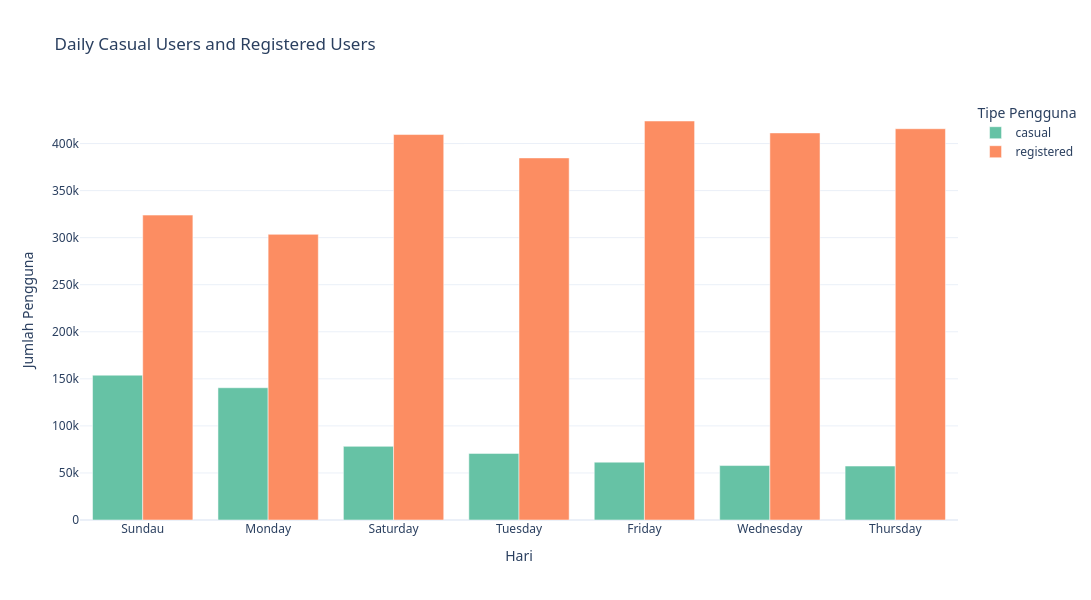

In [141]:
fig = px.bar(
    daily,
    x="day",
    y=["casual", "registered"],
    title="Daily Casual Users and Registered Users",
    labels={"value": "Jumlah Pengguna", 
            "day": "Hari", 
            "variable": "Tipe Pengguna"},
    barmode="group",
    color="variable",  # Warna berdasarkan tipe pengguna
    color_discrete_sequence=px.colors.qualitative.Set2  # Skema warna yang menarik
)
fig.update_traces(
    hovertemplate="Day: %{x}<br>Tipe: %{legendgroup}<br>Jumlah: %{y:,}"
)
fig.update_layout(
    template="plotly_white",
    height=600,
    width=700
)
fig.show()

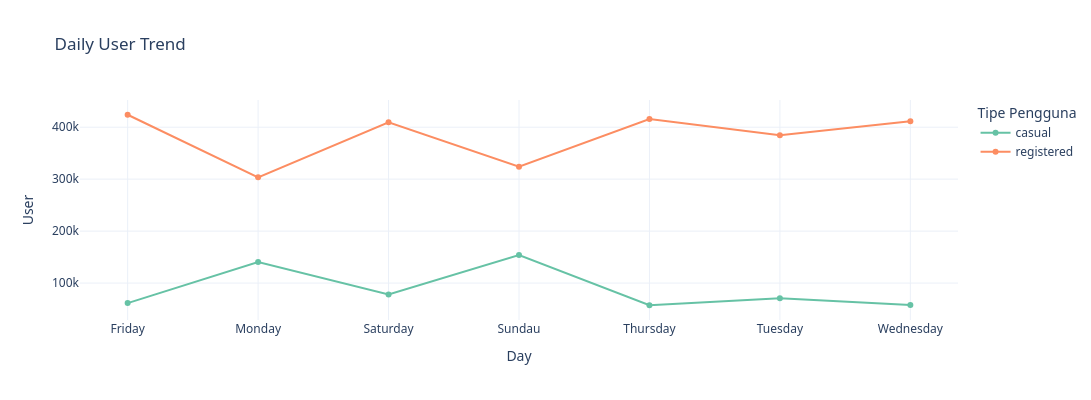

In [142]:
fig = px.line(
    daily.sort_values("day"),
    x="day",
    y=["casual", "registered"],
    title="Daily User Trend",
    labels={"value": "User", "day": "Day", "variable": "Tipe Pengguna"},
    markers=True,
    color="variable",  # Warna berdasarkan tipe pengguna
    color_discrete_sequence=px.colors.qualitative.Set2  # Skema warna yang menarik
)
fig.update_traces(
    hovertemplate="Day: %{x}<br>Tipe: %{legendgroup}<br>Jumlah: %{y:,}"
)
fig.update_layout(
    template="plotly_white",
    height=400,
    width=700
)
fig.show()

In [143]:
# Hitung total pengguna berdasarkan musim
byseason = hour_df.groupby("seasons")["total_user"].sum().sort_values(ascending=False).reset_index()

# Hitung total pengguna berdasarkan cuaca
byweather = hour_df.groupby("weather")["total_user"].sum().sort_values(ascending=False).reset_index()

# Rename kolom agar tidak bentrok saat digabung
byseason.columns = ['category', 'total_user']
byseason['type'] = 'Season'

byweather.columns = ['category', 'total_user']
byweather['type'] = 'Weather'

# Gabungkan
compare = pd.concat([byseason, byweather], axis=0).reset_index(drop=True)
compare

,category,total_user,type
0,Fall,1061129,Season
1,Summer,918589,Season
2,Winter,841613,Season
3,Springer,471348,Season
4,Clear,2338173,Weather
5,Mist,795952,Weather
6,Light Snow,158331,Weather
7,Heavy Rain,223,Weather


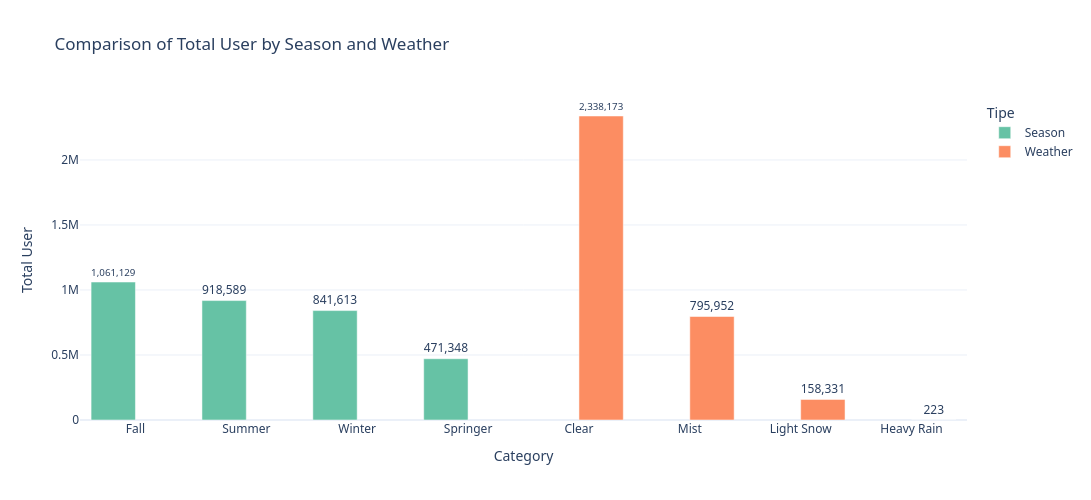

In [144]:
fig = px.bar(
    compare,
    x="category",
    y="total_user",
    color="type",
    barmode="group",
    text="total_user",
    labels={
        "category": "Category",
        "total_user": "Total User",
        "type": "Tipe"
    },
    title="Comparison of Total User by Season and Weather",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(
    texttemplate='%{text:,}',
    textposition='outside',
    hovertemplate="Kategori: %{x}<br>Tipe: %{legendgroup}<br>Total: %{y:,}"
)

fig.update_layout(
    template="plotly_white",
    height=500,
    width=900
)

fig.show()

In [145]:
day_df.instant.is_unique

True

In [146]:
hour_df.instant.is_unique

True

In [147]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [148]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa pengguna sepeda paling banyak menyewa sepeda dalam satu hari, dan bagaimana pola penggunaannya antara pengguna casual dan registered?

In [149]:
# Hitung total sewa per jam
hourly_usage = hour_df.groupby('hour')[['casual', 'registered', 'total_user']].mean().reset_index()

hourly_usage

,hour,casual,registered,total_user
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


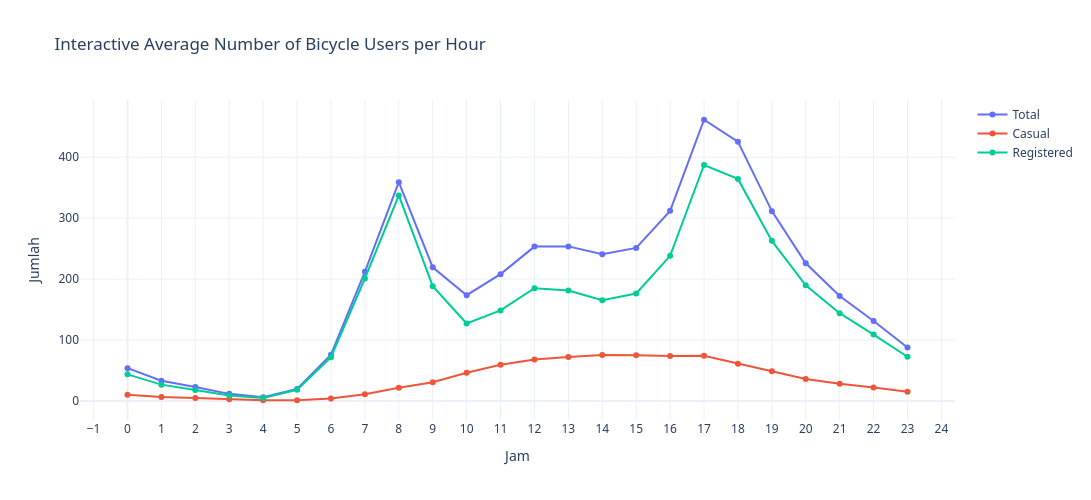

In [150]:
# Membuat grafik interaktif
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hourly_usage['hour'],
    y=hourly_usage['total_user'],
    mode='lines+markers',
    name='Total',
    hovertemplate='Hour: %{x}<br>Total: %{y:.2f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=hourly_usage['hour'],
    y=hourly_usage['casual'],
    mode='lines+markers',
    name='Casual',
    hovertemplate='hour: %{x}<br>Casual: %{y:.2f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=hourly_usage['hour'],
    y=hourly_usage['registered'],
    mode='lines+markers',
    name='Registered',
    hovertemplate='hour: %{x}<br>Registered: %{y:.2f}<extra></extra>'
))

fig.update_layout(
    title='Interactive Average Number of Bicycle Users per Hour',
    xaxis_title='Jam',
    yaxis_title='Jumlah',
    xaxis=dict(tickmode='linear',tickvals=list(range(0, 24))),
    template='plotly_white',
    width=1000,
    height=500,
)

fig.show()

### Pertanyaan 2: Bagaimana tren peminjaman sepeda berdasarkan musim (season)?

In [151]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   seasons     731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   day         731 non-null    object        
 6   workingday  731 non-null    object        
 7   weather     731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  total_user  731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 85.8+ 

In [152]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   seasons     17379 non-null  object 
 3   year        17379 non-null  object 
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   day         17379 non-null  object 
 7   workingday  17379 non-null  object 
 8   weather     17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  humidity    17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  total_user  17379 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 2.1+ MB


In [153]:
# Hitung rata-rata peminjaman per musim
# season_mapping2 = {1: 'Springer', 2: 'Summer',
#                   3: 'Fall',4: 'Winter'}
# day_df['season'] = day_df['season'].map(season_mapping2)
# hour_df['season'] = hour_df['season'].map(season_mapping2)
avg_rentals_season = day_df.groupby("seasons")['total_user'].mean().sort_values().reset_index()
avg_rentals_season.columns = ['Season', 'Average Rentals']

print(avg_rentals_season)

     Season  Average Rentals
0  Springer      2604.132597
1    Winter      4728.162921
2    Summer      4992.331522
3      Fall      5644.303191


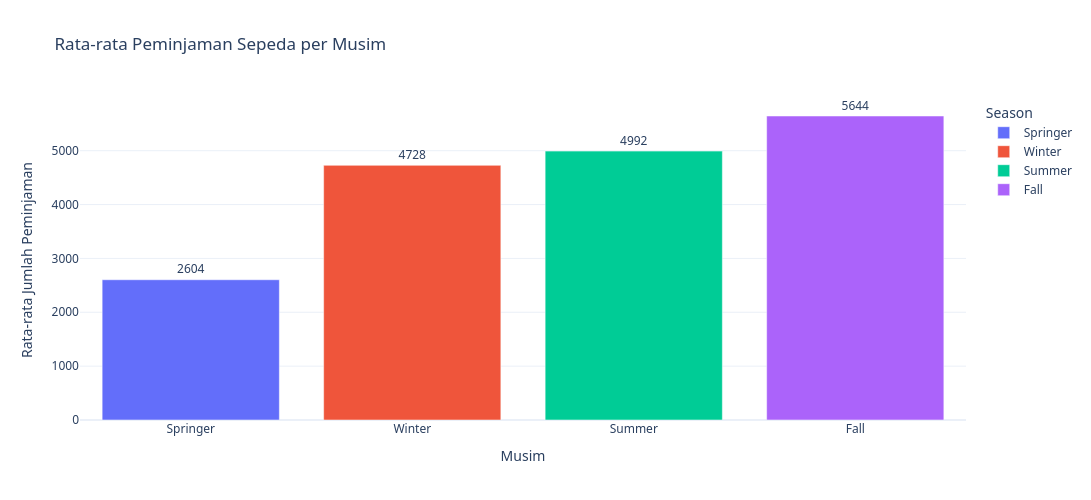

In [167]:
fig = px.bar(
    avg_rentals_season,
    x="Season",
    y="Average Rentals",
    text='Average Rentals',
    color='Season',
    title='Rata-rata Peminjaman Sepeda per Musim',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_traces(
    hovertemplate='Musim: %{x}<br>Rata-rata: %{y:.2f}',
    texttemplate='%{text:.0f}',
    textposition='outside'
)

fig.update_layout(
    template='plotly_white',
    xaxis_title='Musim',
    yaxis_title='Rata-rata Jumlah Peminjaman',
    width=600,
    height=500
)

fig.show()

In [168]:
import streamlit as st
st.plotly_chart(fig, use_container_width=True)

2025-07-12 12:00:38.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 12:00:38.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 12:00:38.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 12:00:38.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 12:00:38.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

### Pertanyaan 3: Bulan apa yang menunjukkan tingkat peminjaman sepeda tertinggi dalam setahun? 

In [169]:
# Hitung rata-rata peminjaman per bulan
monthly_usage = day_df.groupby('month')['total_user'].mean().reset_index()
monthly_usage

,month,total_user
0,April,4484.900000
1,August,5664.419355
2,December,3403.806452
3,February,2655.298246
4,January,2176.338710
5,July,5563.677419
6,June,5772.366667
7,March,3692.258065
8,May,5349.774194
9,November,4247.183333


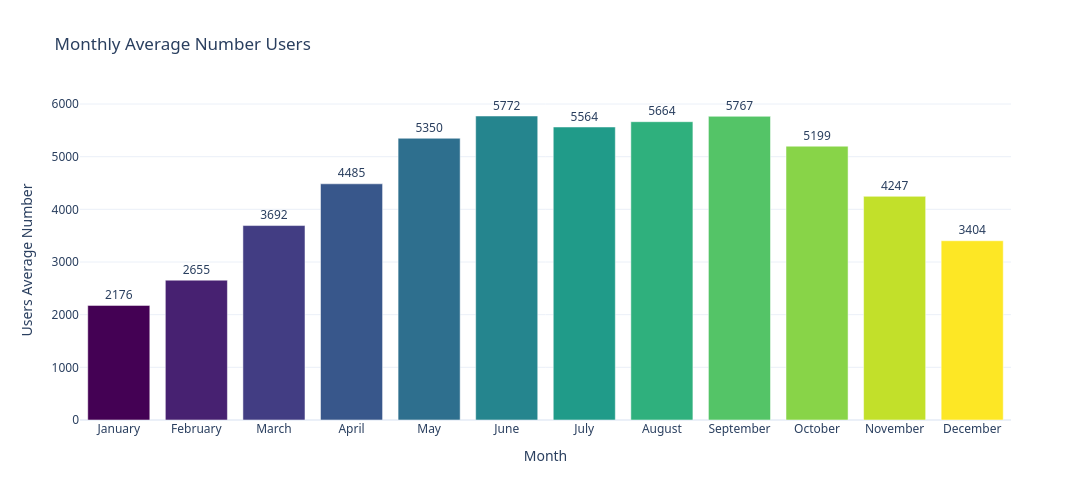

In [170]:
# Mapping bulan ke angka (untuk gradasi warna)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Tambahkan kolom numerik untuk bulan
monthly_usage['month_num'] = monthly_usage['month'].map(month_mapping).astype(int)

# Ubah kolom 'month' jadi kategorikal berurutan
month_order = list(month_mapping.keys())
monthly_usage['month'] = pd.Categorical(monthly_usage['month'], categories=month_order, ordered=True)

# Urutkan DataFrame berdasarkan urutan bulan
monthly_usage = monthly_usage.sort_values('month')

# Plot dengan gradasi Viridis
fig = px.bar(
    monthly_usage,
    x='month',
    y='total_user',
    text='total_user',
    color='month_num',  # Gradasi warna berdasarkan urutan bulan
    labels={'month': 'Month', 'total_user': 'Users Average Number'},
    title='Monthly Average Number Users',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    template='plotly_white',
    width=850,
    height=500,
    coloraxis_showscale=False  # Sembunyikan legend gradasi (optional)
)

fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    hovertemplate='Month: %{x}<br>User: %{y:.0f}'
)

fig.show()


## Conclusion

#### Pertanyaan 1
Hari kerja menunjukkan dua puncak jam 8 pagi saat menunjukan waktu berangkat bekerja dan jam 5–6 sore menandakan saat pulang bekerja (dominan registered) serta Hari libur menunjukkan puncak sekitar jam 1 siang hingga sore (casual). keduanya memiliki kecendrungan yang berbeda sebagai contoh pengguna casual cenderung menggunakan untuk ber-rekreasi.


#### Pertanyaan 2
Peminjaman sepeda paling tinggi terjadi di musim Fall (Gugur) dan paling rendah di musim Spring (Semi). Hal ini mungkin karena cuaca lebih nyaman di musim gugur dan musim semi cenderung hujan di wilayah data ini dikumpulkan.


#### Pertanyaan 3
Peminjaman sepeda tertinggi terjadi pada bulan Juni hingga September. Ini mengindikasikan bahwa musim panas/musim kemarau meningkatkan penggunaan sepeda karena cuaca yang mendukung dan bulan-bulan musim dingin seperti Januari–Februari memiliki jumlah pengguna yang lebih sedikit.
